In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt



%matplotlib inline

In [7]:
G = nx.read_gml("./../data/GraphMissingEdges.gml")

categories_nodes = nx.get_node_attributes(G,'categories')
for key in categories_nodes:
    categories_nodes[key] = categories_nodes[key].split(',')

categories_df = pd.read_csv('./../data/categories.csv', sep=',')
categories_df = categories_df.set_index('CategoryId')

for node in G.nodes:
    categories = categories_nodes[node]
    categories_names = []
    for category in categories:
        if category != '':
            categories_names.append(categories_df.loc[int(category)]['names'])
    nx.set_node_attributes(G, {node: categories_names}, 'categories_names')

In [11]:
nx.get_node_attributes(G,'name')

{'ql0AaBp68ckekxvWOF8xLA': 'Cafe Fifth Ave',
 'WHxonk9W_sRLk8cwOoZQqQ': 'Good Fellas Barber Shop',
 'P6HDtlj1GSu9UG2Aal2PPg': 'Tightspot Dancewear Center',
 '3kUqNxO1rkDDb89GAfyNgw': 'Evolve Wellness Spa Shadyside',
 'v_pED2nMFPsBGD4Tq2ygBw': 'Nova Dental Associates',
 'nZDIrGshkfLZf6ImQtAasQ': 'The Saloon of Mt Lebanon',
 'cqPrr2uDMLP9_cPbIiOSrA': 'Bagel Factory',
 'O1ird5yRyuDFnOmYu90OoA': 'Round Corner Cantina',
 '-UjCvAsvBOr19y8lqPueiQ': 'China Garden',
 'zzBa0pQjM1gov00bXjYYXg': 'South Side BBQ Company Truck',
 '6JRFtzzJUYZxFC7mWa9_xQ': '#1 Cochran Nissan - Pittsburgh',
 '2VRVAhzefxIqjzbQ21LdHg': 'The Foundry Table & Tap',
 'MLVnaAgR3FD2O9mBTKDqoQ': 'Pasha Cafe Lounge',
 'wjLgM9Ybe5shoUPRrGMmsQ': 'Coca Cafe',
 'AdHBtjNeuuAU4w6E7NCkfQ': 'Regis Salon',
 '2A9gJkmWbBVoh6kK0jDlxA': 'La Pizza Bella',
 'XUDOc980cjB0PZvVS-T6Eg': 'Jimmy Wans',
 'f2FfutZhb4F-m1Ob0EdYaw': 'China Palace',
 'X47pt6a4ID4aM2ONYdSW8Q': 'The Coffee Tree Roasters',
 'pzKdQnjQUtMGLgPW6Fxr_Q': 'Big Lots',
 '-1PwcnMwa

In [13]:
for node in G.nodes:
    print(G.nodes[node]['name'], G.nodes[node]['categories_names'])
    print(G.degree(node))
    print('------------------')

Cafe Fifth Ave ['Restaurants', 'Cafes']
2
------------------
Good Fellas Barber Shop ['Beauty & Spas', 'Barbers']
2
------------------
Tightspot Dancewear Center ['Shopping', 'Arts & Crafts', 'Shoe Stores', 'Costumes', 'Fashion']
1
------------------
Evolve Wellness Spa Shadyside ['Day Spas', 'Beauty & Spas', 'Health & Medical', 'Acupuncture', 'Massage Therapy', 'Massage']
17
------------------
Nova Dental Associates ['Orthodontists', 'Health & Medical', 'General Dentistry', 'Cosmetic Dentists', 'Oral Surgeons', 'Dentists']
0
------------------
The Saloon of Mt Lebanon ['Nightlife', 'Restaurants', 'Sports Bars', 'Bars', 'American (Traditional)', 'Burgers']
12
------------------
Bagel Factory ['Bakeries', 'Restaurants', 'Bagels', 'Food']
3
------------------
Round Corner Cantina ['Lounges', 'Restaurants', 'Cocktail Bars', 'Mexican', 'Nightlife', 'Bars', 'Dance Clubs']
46
------------------
China Garden ['Chinese', 'Restaurants']
4
------------------
South Side BBQ Company Truck ['Catere

Text(0, 0.5, 'Numero de nós')

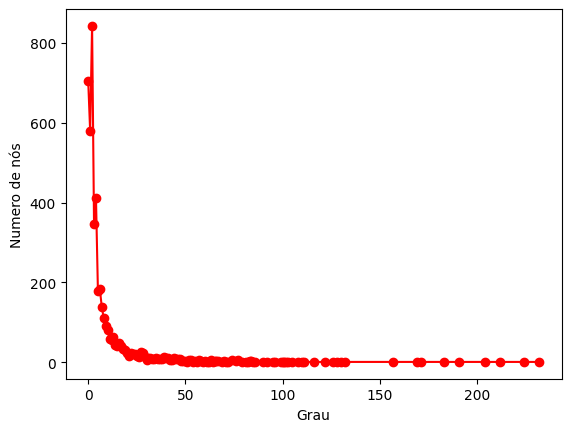

In [14]:
dicDegree = dict(G.degree() )
valores = sorted(set(dicDegree.values()))
valores

hist = [list(dicDegree.values()).count(x) for x in valores]

plt.plot(valores, hist, 'ro-') 

plt.xlabel('Grau')
plt.ylabel('Numero de nós')

In [15]:
print(nx.average_clustering(G))

0.04489358044799767


In [18]:
for node in G.nodes:
    if G.degree(node) > 0:
        print(G.nodes[node]['name'], nx.clustering(G, node))
        print('------------------')

Cafe Fifth Ave 0
------------------
Good Fellas Barber Shop 0
------------------
Tightspot Dancewear Center 0
------------------
Evolve Wellness Spa Shadyside 0.0761904761904762
------------------
The Saloon of Mt Lebanon 0.15555555555555556
------------------
Bagel Factory 0
------------------
Round Corner Cantina 0.12657004830917876
------------------
China Garden 0
------------------
South Side BBQ Company Truck 0.14285714285714285
------------------
#1 Cochran Nissan - Pittsburgh 0
------------------
The Foundry Table & Tap 0.08571428571428572
------------------
Pasha Cafe Lounge 0.11585365853658537
------------------
Coca Cafe 0.08441318030359127
------------------
Regis Salon 0
------------------
La Pizza Bella 0
------------------
Jimmy Wans 0
------------------
China Palace 0.03296703296703297
------------------
The Coffee Tree Roasters 0.022222222222222223
------------------
Big Lots 0
------------------
Ulta Beauty 0
------------------
Juju 0
------------------
Commodore Barb

In [25]:
print(f"density: {nx.density(G)}")

density: 0.0018150582646987846


In [47]:
list_peso = []

for v, u in G.edges:
    if G.get_edge_data(v,u)['weight'] >= 21:
        print(G.nodes[v]['name'] + ' --------------- ' + G.nodes[u]['name'])
        list_peso.append(G.get_edge_data(v,u))
        print(G.get_edge_data(v,u))

print(max(list_peso, key=lambda x:x['weight']))
        
        

täkō --------------- Gaucho Parrilla Argentina
{'weight': 21}
{'weight': 21}


ValueError: x and y must have same first dimension, but have shapes (110,) and (13,)

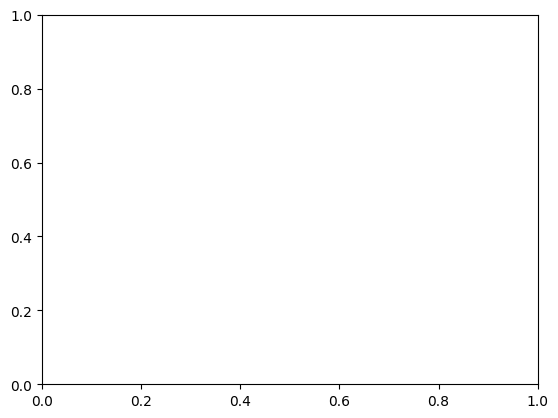

In [62]:
peso_edge = []

for v, u in G.edges:
    if G.get_edge_data(v,u)['weight'] > 0:
        peso_edge.append(G.get_edge_data(v,u)['weight'])

list_peso = []
for i in peso_edge:
    list_peso.append(i)

lista = sorted(set(list_peso))

hist = [peso_edge.count(x) for x in valores]

plt.plot(hist ,lista, 'ro-') 

plt.xlabel('Grau')
plt.ylabel('Numero de nós')

In [61]:
hist

[0,
 17584,
 1054,
 222,
 68,
 32,
 13,
 7,
 3,
 0,
 2,
 0,
 3,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]